# Net Radiation Data Preparation

In [11]:
# load required packages
library(dplyr)
library(lubridate)

# Read the data
data <- read.csv("../data/FLX_CH-Oe2_FLUXNET2015_FULLSET_2004-2023_1-3/FLX_CH-Oe2_FLUXNET2015_FULLSET_DD_2004-2023_1-3.csv")
colnames(data)

# Convert the date column to Date type
data$TIMESTAMP <- as.Date(data$TIMESTAMP, format="%Y-%m-%d")
# Calculate net radiation (handle missing values)
data$netrad <- with(data, SW_IN_F - SW_OUT_F + LW_IN_F - LW_OUT_F)

# Create new dataframe with date and net radiation
netrad_df <- data %>%
  select(TIMESTAMP, netrad)

# Show first few rows
head(netrad_df)

# Optionally, save to CSV
write.csv(netrad_df, "../data/01_data_prep/04_netrad.csv", row.names = FALSE)

[1] "TIMESTAMP"                      "TA_F_MDS"                      
  [3] "TA_F_MDS_QC"                    "TA_F_MDS_NIGHT"                
  [5] "TA_F_MDS_NIGHT_SD"              "TA_F_MDS_NIGHT_QC"             
  [7] "TA_F_MDS_DAY"                   "TA_F_MDS_DAY_SD"               
  [9] "TA_F_MDS_DAY_QC"                "TA_ERA"                        
 [11] "TA_ERA_NIGHT"                   "TA_ERA_NIGHT_SD"               
 [13] "TA_ERA_DAY"                     "TA_ERA_DAY_SD"                 
 [15] "TA_F"                           "TA_F_QC"                       
 [17] "TA_F_NIGHT"                     "TA_F_NIGHT_SD"                 
 [19] "TA_F_NIGHT_QC"                  "TA_F_DAY"                      
 [21] "TA_F_DAY_SD"                    "TA_F_DAY_QC"                   
 [23] "SW_IN_POT"                      "SW_IN_F_MDS"                   
 [25] "SW_IN_F_MDS_QC"                 "SW_IN_ERA"                     
 [27] "SW_IN_F"                        "SW_IN_F_QC"                    
 [29] "LW_IN_F_MDS"                    "LW_IN_F_MDS_QC"                
 [31] "LW_IN_ERA"                      "LW_IN_F"                       
 [33] "LW_IN_F_QC"                     "LW_IN_JSB"                     
 [35] "LW_IN_JSB_QC"                   "LW_IN_JSB_ERA"                 
 [37] "LW_IN_JSB_F"                    "LW_IN_JSB_F_QC"                
 [39] "VPD_F_MDS"                      "VPD_F_MDS_QC"                  
 [41] "VPD_ERA"                        "VPD_F"                         
 [43] "VPD_F_QC"                       "PA_ERA"                        
 [45] "PA_F"                           "PA_F_QC"                       
 [47] "P_ERA"                          "P_F"                           
 [49] "P_F_QC"                         "WS_ERA"                        
 [51] "WS_F"                           "WS_F_QC"                       
 [53] "USTAR"                          "USTAR_QC"                      
 [55] "PPFD_IN"                        "PPFD_IN_QC"                    
 [57] "PPFD_DIF"                       "PPFD_DIF_QC"                   
 [59] "CO2_F_MDS"                      "CO2_F_MDS_QC"                  
 [61] "TS_F_MDS_1"                     "TS_F_MDS_2"                    
 [63] "TS_F_MDS_3"                     "TS_F_MDS_4"                    
 [65] "TS_F_MDS_5"                     "TS_F_MDS_6"                    
 [67] "TS_F_MDS_7"                     "TS_F_MDS_1_QC"                 
 [69] "TS_F_MDS_2_QC"                  "TS_F_MDS_3_QC"                 
 [71] "TS_F_MDS_4_QC"                  "TS_F_MDS_5_QC"                 
 [73] "TS_F_MDS_6_QC"                  "TS_F_MDS_7_QC"                 
 [75] "SWC_F_MDS_1"                    "SWC_F_MDS_2"                   
 [77] "SWC_F_MDS_3"                    "SWC_F_MDS_4"                   
 [79] "SWC_F_MDS_1_QC"                 "SWC_F_MDS_2_QC"                
 [81] "SWC_F_MDS_3_QC"                 "SWC_F_MDS_4_QC"                
 [83] "G_F_MDS"                        "G_F_MDS_QC"                    
 [85] "LE_F_MDS"                       "LE_F_MDS_QC"                   
 [87] "LE_CORR"                        "LE_CORR_25"                    
 [89] "LE_CORR_75"                     "LE_RANDUNC"                    
 [91] "LE_CORR_JOINTUNC"               "H_F_MDS"                       
 [93] "H_F_MDS_QC"                     "H_CORR"                        
 [95] "H_CORR_25"                      "H_CORR_75"                     
 [97] "H_RANDUNC"                      "H_CORR_JOINTUNC"               
 [99] "EBC_CF_N"                       "EBC_CF_METHOD"                 
[101] "NIGHT_D"                        "DAY_D"                         
[103] "NIGHT_RANDUNC_N"                "DAY_RANDUNC_N"                 
[105] "NEE_CUT_REF"                    "NEE_VUT_REF"                   
[107] "NEE_CUT_REF_QC"                 "NEE_VUT_REF_QC"                
[109] "NEE_CUT_REF_RANDUNC"            "NEE_VUT_REF_RANDUNC"           
[111] "NEE_CUT_REF_JOINTUNC"           "NE

ERROR: Error in eval(substitute(expr), data, enclos = parent.frame()): Objekt 'SW_OUT_F' nicht gefunden


> This error comes because we do not have the SW_OUT and LW_OUT columns in the dataset.

## Therefore, we are using alternative methods to calculate net radiation using following methods:
1. Energy Balance Method: Uses H + LE + G (most accurate if available)
2. Radiation Approximation: Uses SW_IN_F, LW_IN_F, and estimates outgoing components
3. Simple SW Approximation: Uses only incoming solar radiation (rough estimate)


In [19]:
# load required packages
library(dplyr)
library(lubridate)

# Read the data
data <- read.csv("../data/FLX_CH-Oe2_FLUXNET2015_FULLSET_2004-2023_1-3/FLX_CH-Oe2_FLUXNET2015_FULLSET_DD_2004-2023_1-3.csv")
colnames(data)

# Convert the date column to Date type
data$TIMESTAMP <- as.Date(as.character(data$TIMESTAMP), format="%Y%m%d")

# Verify date conversion worked
print("Date conversion verification:")
print(paste("First date:", head(data$TIMESTAMP, 1)))
print(paste("Last date:", tail(data$TIMESTAMP, 1)))
print(paste("Date range:", range(data$TIMESTAMP, na.rm = TRUE)))

# Check available radiation columns
rad_cols <- grep("SW_|LW_|PPFD", names(data), value = TRUE)
print("Available radiation columns:")
print(rad_cols)

# Check available energy balance columns
energy_cols <- grep("H_F|LE_F|G_F", names(data), value = TRUE)
print("Available energy balance columns:")
print(energy_cols)

# Method 1: Simple approximation using available data
# Net radiation ≈ SW_IN_F * (1 - albedo) + LW_IN_F - LW_OUT_estimated
# Typical albedo for grassland/forest: 0.15-0.25
albedo <- 0.20

# Estimate outgoing longwave using Stefan-Boltzmann law
# LW_OUT ≈ ε × σ × T^4, where ε ≈ 0.95-0.98 for vegetation
# Simplified: LW_OUT ≈ 0.96 × σ × (T + 273.15)^4
sigma <- 5.67e-8  # Stefan-Boltzmann constant (W m-2 K-4)
emissivity <- 0.96

if ("TA_F_MDS" %in% names(data)) {
  # Use air temperature as proxy for surface temperature
  data$LW_OUT_est <- emissivity * sigma * (data$TA_F_MDS + 273.15)^4
  
  # Calculate net radiation with approximation
  data$netrad_approx <- with(data, SW_IN_F * (1 - albedo) + LW_IN_F - LW_OUT_est)
  
  print("Radiation approximation method: Successfully calculated")
} else {
  print("Temperature data not available for LW_OUT estimation")
  data$netrad_approx <- NA
}

# Method 2: Use empirical relationship if only SW data available
# Net radiation ≈ 0.6 to 0.8 of incoming solar radiation (rough approximation)
data$netrad_simple <- data$SW_IN_F * 0.7
print("Simple SW method: Successfully calculated")

# Method 3: Check if we have sensible heat flux (H_F_MDS) and latent heat flux (LE_F_MDS)
# Energy balance: Rn = H + LE + G (where G is soil heat flux)
if (all(c("H_F_MDS", "LE_F_MDS", "G_F_MDS") %in% names(data))) {
  data$netrad_energy_balance <- with(data, H_F_MDS + LE_F_MDS + G_F_MDS)
  print("Energy balance method: H + LE + G calculated successfully")
} else if (all(c("H_F_MDS", "LE_F_MDS") %in% names(data))) {
  # Assume soil heat flux G ≈ 0.1 * Rn for daily data, or ignore for rough estimate
  data$netrad_energy_balance <- with(data, H_F_MDS + LE_F_MDS)
  print("Energy balance method: H + LE calculated (G not available)")
} else {
  data$netrad_energy_balance <- NA
  print("Energy balance components not available")
}

# Show statistics for each method before choosing final
print("\n=== METHOD COMPARISON STATISTICS ===")
if(!all(is.na(data$netrad_energy_balance))) {
  print(paste("Energy Balance - Mean:", round(mean(data$netrad_energy_balance, na.rm = TRUE), 2)))
  print(paste("Energy Balance - Range:", round(min(data$netrad_energy_balance, na.rm = TRUE), 2), "to", round(max(data$netrad_energy_balance, na.rm = TRUE), 2)))
}

if(!all(is.na(data$netrad_approx))) {
  print(paste("Radiation Approx - Mean:", round(mean(data$netrad_approx, na.rm = TRUE), 2)))
  print(paste("Radiation Approx - Range:", round(min(data$netrad_approx, na.rm = TRUE), 2), "to", round(max(data$netrad_approx, na.rm = TRUE), 2)))
}

if(!all(is.na(data$netrad_simple))) {
  print(paste("Simple SW - Mean:", round(mean(data$netrad_simple, na.rm = TRUE), 2)))
  print(paste("Simple SW - Range:", round(min(data$netrad_simple, na.rm = TRUE), 2), "to", round(max(data$netrad_simple, na.rm = TRUE), 2)))
}

# Choose the best available method
data$netrad <- case_when(
  !is.na(data$netrad_energy_balance) ~ data$netrad_energy_balance,
  !is.na(data$netrad_approx) ~ data$netrad_approx,
  !is.na(data$netrad_simple) ~ data$netrad_simple,
  TRUE ~ NA_real_
)

# Add method indicator
data$netrad_method <- case_when(
  !is.na(data$netrad_energy_balance) ~ "Energy Balance",
  !is.na(data$netrad_approx) ~ "Radiation Approximation",
  !is.na(data$netrad_simple) ~ "Simple SW Approximation",
  TRUE ~ "No Data"
)

# Create new dataframe with date and net radiation
netrad_df <- data %>%
  select(TIMESTAMP, netrad, netrad_method, netrad_approx, netrad_simple, netrad_energy_balance)

# Show first few rows to verify dates are correct
print("\n=== FINAL OUTPUT VERIFICATION ===")
head(netrad_df)

# Show method distribution
print("\nMethod distribution:")
table(netrad_df$netrad_method)

# Verify final dates in dataframe
print(paste("\nFinal output date range:", min(netrad_df$TIMESTAMP), "to", max(netrad_df$TIMESTAMP)))

# Save to CSV
write.csv(netrad_df, "../data/01_data_prep/04_netrad.csv", row.names = FALSE)

# Read back the saved file to verify
test_read <- read.csv("../data/01_data_prep/04_netrad.csv")
print("\nVerification of saved CSV file:")
print("First 5 dates from saved file:")
print(head(test_read$TIMESTAMP, 5))
print("Data types in saved file:")
print(sapply(test_read, class))

[1] "TIMESTAMP"                      "TA_F_MDS"                      
  [3] "TA_F_MDS_QC"                    "TA_F_MDS_NIGHT"                
  [5] "TA_F_MDS_NIGHT_SD"              "TA_F_MDS_NIGHT_QC"             
  [7] "TA_F_MDS_DAY"                   "TA_F_MDS_DAY_SD"               
  [9] "TA_F_MDS_DAY_QC"                "TA_ERA"                        
 [11] "TA_ERA_NIGHT"                   "TA_ERA_NIGHT_SD"               
 [13] "TA_ERA_DAY"                     "TA_ERA_DAY_SD"                 
 [15] "TA_F"                           "TA_F_QC"                       
 [17] "TA_F_NIGHT"                     "TA_F_NIGHT_SD"                 
 [19] "TA_F_NIGHT_QC"                  "TA_F_DAY"                      
 [21] "TA_F_DAY_SD"                    "TA_F_DAY_QC"                   
 [23] "SW_IN_POT"                      "SW_IN_F_MDS"                   
 [25] "SW_IN_F_MDS_QC"                 "SW_IN_ERA"                     
 [27] "SW_IN_F"                        "SW_IN_F_QC"                    
 [29] "LW_IN_F_MDS"                    "LW_IN_F_MDS_QC"                
 [31] "LW_IN_ERA"                      "LW_IN_F"                       
 [33] "LW_IN_F_QC"                     "LW_IN_JSB"                     
 [35] "LW_IN_JSB_QC"                   "LW_IN_JSB_ERA"                 
 [37] "LW_IN_JSB_F"                    "LW_IN_JSB_F_QC"                
 [39] "VPD_F_MDS"                      "VPD_F_MDS_QC"                  
 [41] "VPD_ERA"                        "VPD_F"                         
 [43] "VPD_F_QC"                       "PA_ERA"                        
 [45] "PA_F"                           "PA_F_QC"                       
 [47] "P_ERA"                          "P_F"                           
 [49] "P_F_QC"                         "WS_ERA"                        
 [51] "WS_F"                           "WS_F_QC"                       
 [53] "USTAR"                          "USTAR_QC"                      
 [55] "PPFD_IN"                        "PPFD_IN_QC"                    
 [57] "PPFD_DIF"                       "PPFD_DIF_QC"                   
 [59] "CO2_F_MDS"                      "CO2_F_MDS_QC"                  
 [61] "TS_F_MDS_1"                     "TS_F_MDS_2"                    
 [63] "TS_F_MDS_3"                     "TS_F_MDS_4"                    
 [65] "TS_F_MDS_5"                     "TS_F_MDS_6"                    
 [67] "TS_F_MDS_7"                     "TS_F_MDS_1_QC"                 
 [69] "TS_F_MDS_2_QC"                  "TS_F_MDS_3_QC"                 
 [71] "TS_F_MDS_4_QC"                  "TS_F_MDS_5_QC"                 
 [73] "TS_F_MDS_6_QC"                  "TS_F_MDS_7_QC"                 
 [75] "SWC_F_MDS_1"                    "SWC_F_MDS_2"                   
 [77] "SWC_F_MDS_3"                    "SWC_F_MDS_4"                   
 [79] "SWC_F_MDS_1_QC"                 "SWC_F_MDS_2_QC"                
 [81] "SWC_F_MDS_3_QC"                 "SWC_F_MDS_4_QC"                
 [83] "G_F_MDS"                        "G_F_MDS_QC"                    
 [85] "LE_F_MDS"                       "LE_F_MDS_QC"                   
 [87] "LE_CORR"                        "LE_CORR_25"                    
 [89] "LE_CORR_75"                     "LE_RANDUNC"                    
 [91] "LE_CORR_JOINTUNC"               "H_F_MDS"                       
 [93] "H_F_MDS_QC"                     "H_CORR"                        
 [95] "H_CORR_25"                      "H_CORR_75"                     
 [97] "H_RANDUNC"                      "H_CORR_JOINTUNC"               
 [99] "EBC_CF_N"                       "EBC_CF_METHOD"                 
[101] "NIGHT_D"                        "DAY_D"                         
[103] "NIGHT_RANDUNC_N"                "DAY_RANDUNC_N"                 
[105] "NEE_CUT_REF"                    "NEE_VUT_REF"                   
[107] "NEE_CUT_REF_QC"                 "NEE_VUT_REF_QC"                
[109] "NEE_CUT_REF_RANDUNC"            "NEE_VUT_REF_RANDUNC"           
[111] "NEE_CUT_REF_JOINTUNC"           "NE

,TIMESTAMP,TA_F_MDS,TA_F_MDS_QC,TA_F_MDS_NIGHT,TA_F_MDS_NIGHT_SD,TA_F_MDS_NIGHT_QC,TA_F_MDS_DAY,TA_F_MDS_DAY_SD,TA_F_MDS_DAY_QC,TA_ERA,...,GPP_DT_CUT_SE,GPP_DT_CUT_05,GPP_DT_CUT_16,GPP_DT_CUT_25,GPP_DT_CUT_50,GPP_DT_CUT_75,GPP_DT_CUT_84,GPP_DT_CUT_95,RECO_SR,RECO_SR_N
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,2004-01-01,-0.581,0.8125,-0.794,0.440,0.7,-0.227,0.183,1,-0.900,...,0.0340593,1.13414,1.19911,1.23201,1.36487,1.51653,1.62378,1.62484,-9999,-9999
2,2004-01-02,-1.069,1.0000,-1.410,0.356,1.0,-0.499,0.383,1,-1.743,...,0.0341022,1.20501,1.26761,1.30089,1.43557,1.58509,1.69062,1.69117,-9999,-9999
3,2004-01-03,-3.389,1.0000,-3.648,1.171,1.0,-2.956,0.247,1,-4.923,...,0.0339712,1.20402,1.26615,1.29930,1.43351,1.58233,1.68740,1.68795,-9999,-9999
4,2004-01-04,-5.489,1.0000,-6.257,3.135,1.0,-4.209,2.717,1,-4.457,...,0.0357306,1.47200,1.52769,1.56315,1.70807,1.85764,1.96368,1.96422,-9999,-9999
5,2004-01-05,-2.451,1.0000,-3.207,2.451,1.0,-1.192,1.358,1,-1.115,...,0.0332839,1.14616,1.20778,1.24000,1.37045,1.51733,1.62141,1.62218,-9999,-9999
6,2004-01-06,-2.562,1.0000,-3.151,2.610,1.0,-1.580,1.719,1,-0.491,...,0.0357427,1.39192,1.45163,1.48690,1.63047,1.78281,1.89057,1.89113,-9999,-9999


[1] "Available radiation columns:"
 [1] "SW_IN_POT"      "SW_IN_F_MDS"    "SW_IN_F_MDS_QC" "SW_IN_ERA"     
 [5] "SW_IN_F"        "SW_IN_F_QC"     "LW_IN_F_MDS"    "LW_IN_F_MDS_QC"
 [9] "LW_IN_ERA"      "LW_IN_F"        "LW_IN_F_QC"     "LW_IN_JSB"     
[13] "LW_IN_JSB_QC"   "LW_IN_JSB_ERA"  "LW_IN_JSB_F"    "LW_IN_JSB_F_QC"
[17] "PPFD_IN"        "PPFD_IN_QC"     "PPFD_DIF"       "PPFD_DIF_QC"   
[1] "Net radiation calculated from energy balance components"
 [1] "SW_IN_POT"      "SW_IN_F_MDS"    "SW_IN_F_MDS_QC" "SW_IN_ERA"     
 [5] "SW_IN_F"        "SW_IN_F_QC"     "LW_IN_F_MDS"    "LW_IN_F_MDS_QC"
 [9] "LW_IN_ERA"      "LW_IN_F"        "LW_IN_F_QC"     "LW_IN_JSB"     
[13] "LW_IN_JSB_QC"   "LW_IN_JSB_ERA"  "LW_IN_JSB_F"    "LW_IN_JSB_F_QC"
[17] "PPFD_IN"        "PPFD_IN_QC"     "PPFD_DIF"       "PPFD_DIF_QC"   
[1] "Net radiation calculated from energy balance components"


,TIMESTAMP,netrad,netrad_method,netrad_approx,netrad_simple,netrad_energy_balance
,<date>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1,2004-01-01,1.339710,Energy Balance,30.30515,25.6662,1.339710
2,2004-01-02,-4.381670,Energy Balance,34.67159,28.0546,-4.381670
3,2004-01-03,-4.583730,Energy Balance,16.32752,28.1029,-4.583730
4,2004-01-04,-9.018790,Energy Balance,28.20961,37.5893,-9.018790
5,2004-01-05,-6.912368,Energy Balance,36.52219,26.5216,-6.912368
6,2004-01-06,-11.309390,Energy Balance,32.12189,34.3105,-11.309390



Energy Balance 
          7305 

The above dataset had the following columns:
- **TIMESTAMP**: Date of observation
- **netrad**: Final calculated net radiation value (best available method)
- **netrad_method**: Method used for calculation (Energy Balance, Radiation Approximation, or Simple SW Approximation)
- **netrad_approx**: Net radiation using radiation approximation method
- **netrad_simple**: Net radiation using simple solar radiation approximation
- **netrad_energy_balance**: Net radiation from energy balance components (H + LE + G)

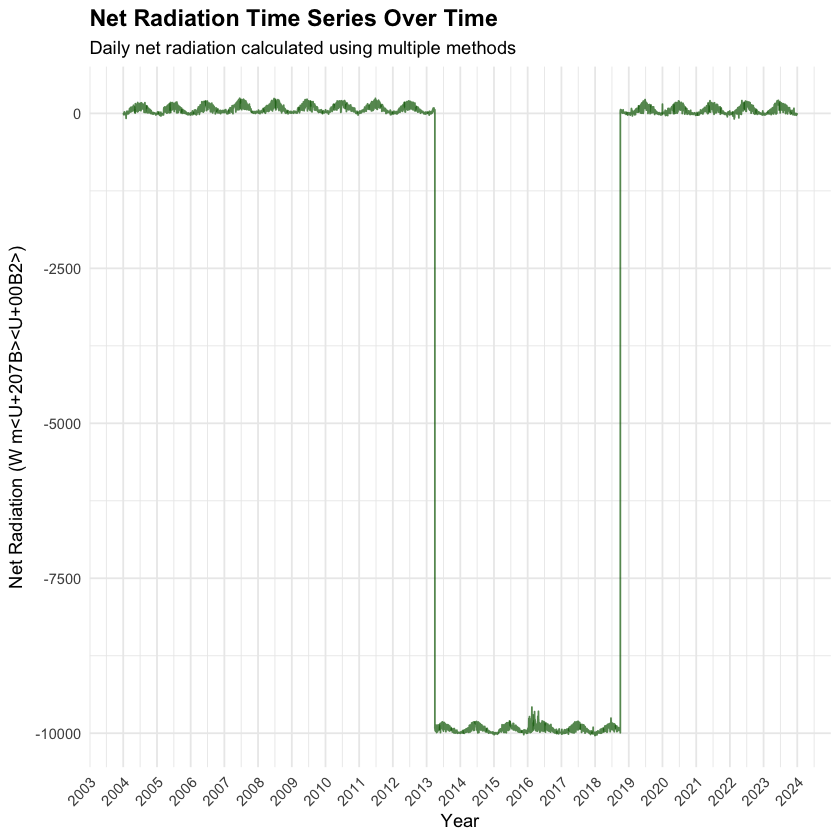

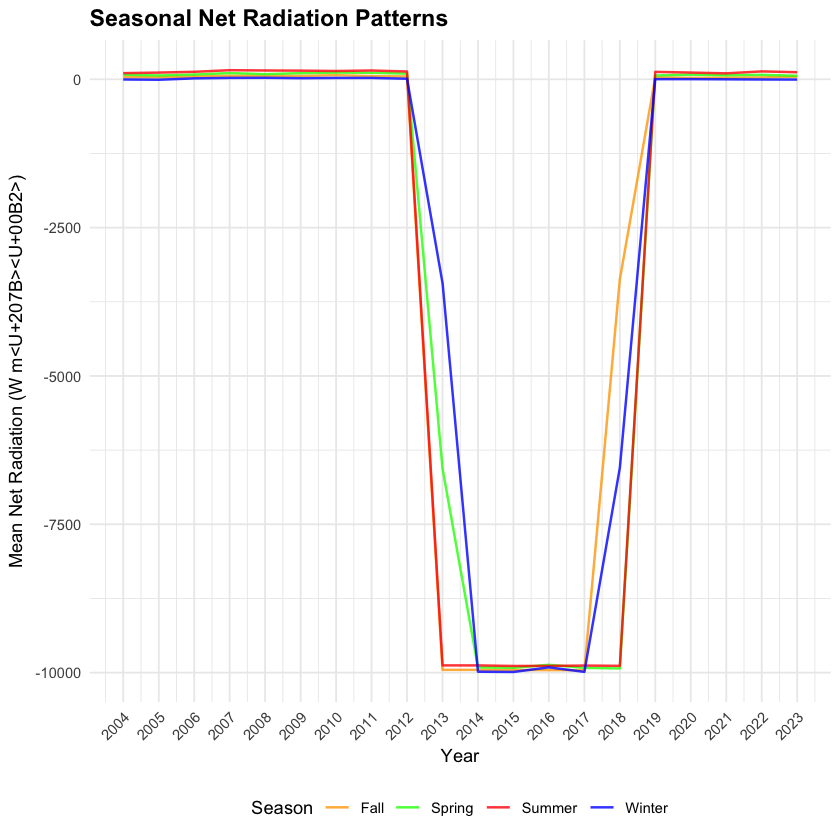

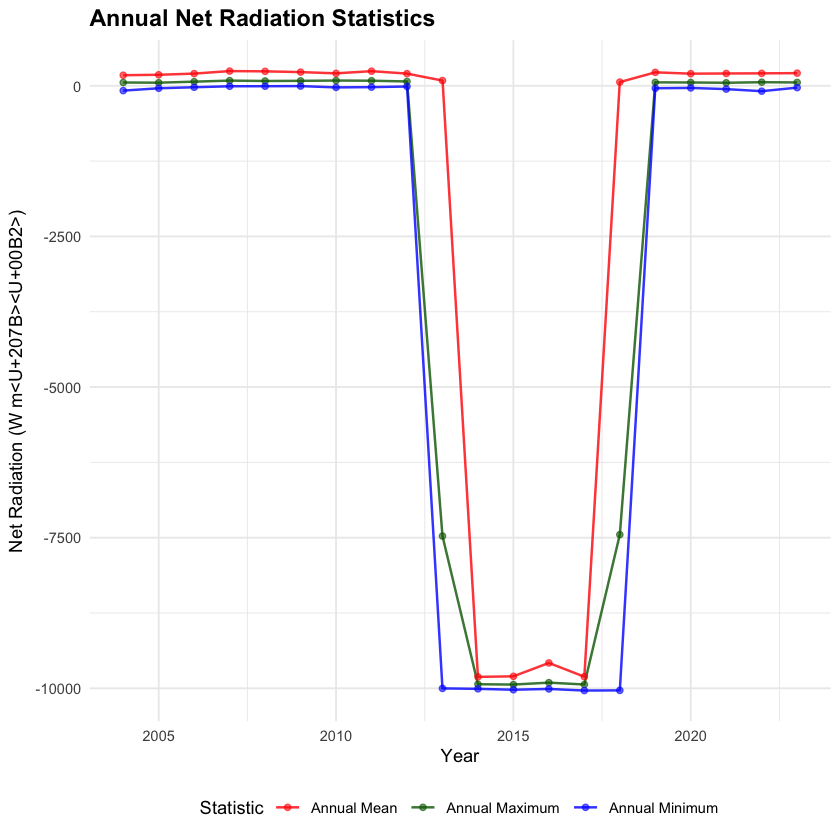

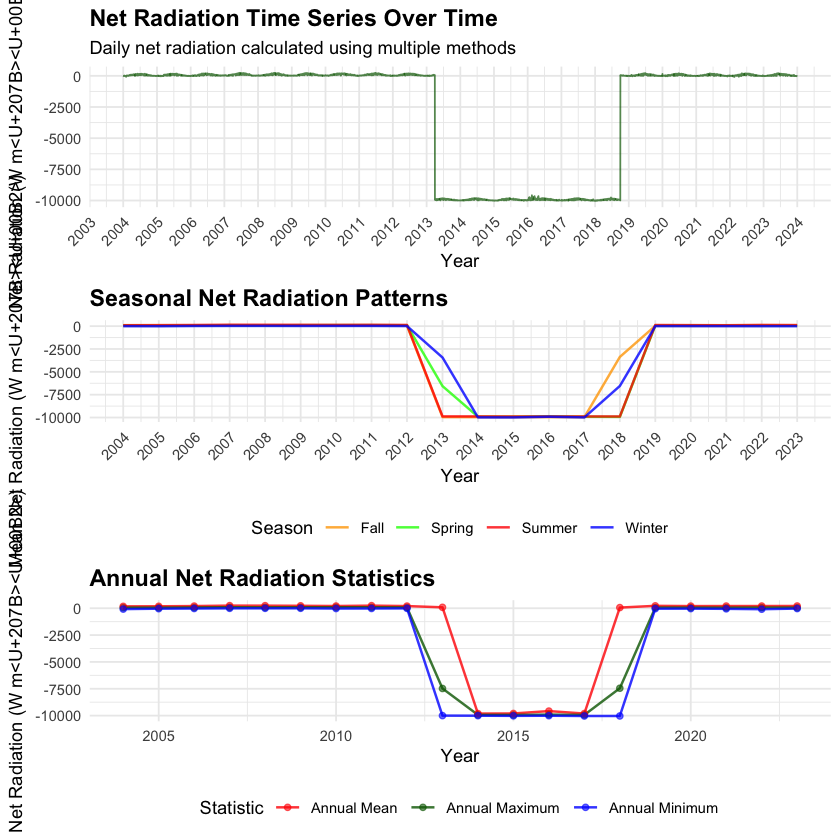

In [35]:
# Load ggplot2 and other required packages for plotting
library(ggplot2)
library(tidyr)
library(gridExtra)

# Add year, month, and season columns for plotting
netrad_df$year <- year(netrad_df$TIMESTAMP)
netrad_df$month <- month(netrad_df$TIMESTAMP)
netrad_df$season <- case_when(
    netrad_df$month %in% c(12, 1, 2) ~ "Winter",
    netrad_df$month %in% c(3, 4, 5) ~ "Spring",
    netrad_df$month %in% c(6, 7, 8) ~ "Summer",
    netrad_df$month %in% c(9, 10, 11) ~ "Fall"
)

# Create main time series plot for net radiation
plot_main <- ggplot(netrad_df, aes(x = TIMESTAMP, y = netrad)) +
        geom_line(color = "darkgreen", alpha = 0.7, linewidth = 0.5) +
        scale_x_date(date_labels = "%Y", date_breaks = "1 years") +
        labs(title = "Net Radiation Time Series Over Time",
                 x = "Year",
                 y = "Net Radiation (W m⁻²)",
                 subtitle = "Daily net radiation calculated using multiple methods") +
        theme_minimal() +
        theme(axis.text.x = element_text(angle = 45, hjust = 1),
                    plot.title = element_text(size = 14, face = "bold"))

# Create seasonal comparison plot
seasonal_data <- netrad_df %>%
        filter(!is.na(netrad)) %>%
        group_by(season, year) %>%
        summarise(mean_netrad = mean(netrad, na.rm = TRUE), .groups = "drop") %>%
        mutate(date = as.Date(paste(year, "01", "01", sep = "-")))

plot_seasonal <- ggplot(seasonal_data, aes(x = date, y = mean_netrad, color = season)) +
        geom_line(alpha = 0.8, linewidth = 0.7) +
        scale_color_manual(values = c("Winter" = "blue", "Spring" = "green", 
                                                                    "Summer" = "red", "Fall" = "orange")) +
        scale_x_date(date_labels = "%Y", date_breaks = "1 years") +
        labs(title = "Seasonal Net Radiation Patterns",
                 x = "Year",
                 y = "Mean Net Radiation (W m⁻²)",
                 color = "Season") +
        theme_minimal() +
        theme(axis.text.x = element_text(angle = 45, hjust = 1),
                    legend.position = "bottom",
                    plot.title = element_text(size = 14, face = "bold"))

# Create annual summary plot
annual_summary <- netrad_df %>%
        filter(!is.na(netrad)) %>%
        group_by(year) %>%
        summarise(
                mean_netrad = mean(netrad, na.rm = TRUE),
                max_netrad = max(netrad, na.rm = TRUE),
                min_netrad = min(netrad, na.rm = TRUE),
                .groups = "drop"
        ) %>%
        pivot_longer(cols = c(mean_netrad, max_netrad, min_netrad),
                                 names_to = "stat_type",
                                 values_to = "netrad_value")

plot_annual <- ggplot(annual_summary, aes(x = year, y = netrad_value, color = stat_type)) +
        geom_line(alpha = 0.8, linewidth = 0.7) +
        geom_point(alpha = 0.6, size = 1.5) +
        scale_color_manual(values = c("mean_netrad" = "darkgreen", 
                                                                    "max_netrad" = "red", 
                                                                    "min_netrad" = "blue"),
                                             labels = c("Annual Mean", "Annual Maximum", "Annual Minimum")) +
        labs(title = "Annual Net Radiation Statistics",
                 x = "Year",
                 y = "Net Radiation (W m⁻²)",
                 color = "Statistic") +
                         theme_minimal() +
        theme(legend.position = "bottom",
                    plot.title = element_text(size = 14, face = "bold"))

# Display individual plots
print(plot_main)
print(plot_seasonal)
print(plot_annual)

# Create the directory for trend plots if it does not exist
if (!dir.exists("../data/01_data_prep/trend_plots")) {
        dir.create("../data/01_data_prep/trend_plots", recursive = TRUE)
}

# Save individual plots
ggsave("../data/01_data_prep/trend_plots/04_netrad_main_series.png", 
             plot = plot_main, width = 12, height = 6, bg = "white", dpi = 300)

ggsave("../data/01_data_prep/trend_plots/04_netrad_seasonal.png", 
             plot = plot_seasonal, width = 12, height = 6, bg = "white", dpi = 300)

ggsave("../data/01_data_prep/trend_plots/04_netrad_annual.png", 
             plot = plot_annual, width = 10, height = 6, bg = "white", dpi = 300)

# Create combined plot
plot_combined <- grid.arrange(plot_main, plot_seasonal, plot_annual, ncol = 1)

# Save the combined plot
ggsave("../data/01_data_prep/trend_plots/04_netrad_combined.png", 
             plot = plot_combined, width = 12, height = 15, bg = "white", dpi = 300)
